Следующий подход к построению рекомендательных систем, который мы изучим, — это коллаборативная фильтрация. Она основана на поиске сходства между пользователями или между продуктами. Используя этот метод, мы можем прогнозировать рейтинги на основе оценок похожих пользователей или похожих продуктов.

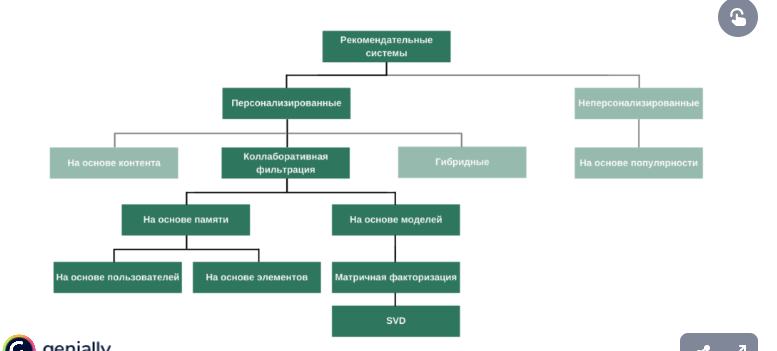

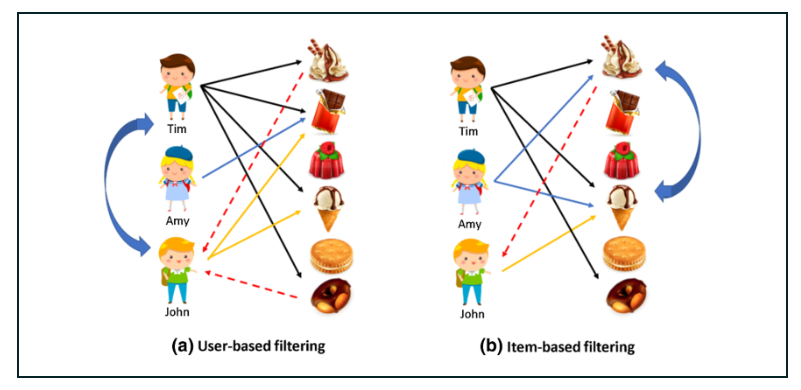

Однако для начала давайте рассмотрим очень часто встречающуюся в рекомендательных системах концепцию — матрицу предпочтений.

Чтобы её получить, расположим в матрице клиентов по строкам, а продукты — по столбцам. На пересечении строк и столбцов разместим оценки, поставленные клиентами соответствующим продуктам: первый клиент поставил второму товару 3, третий клиент поставил первому товару 2 и так далее.

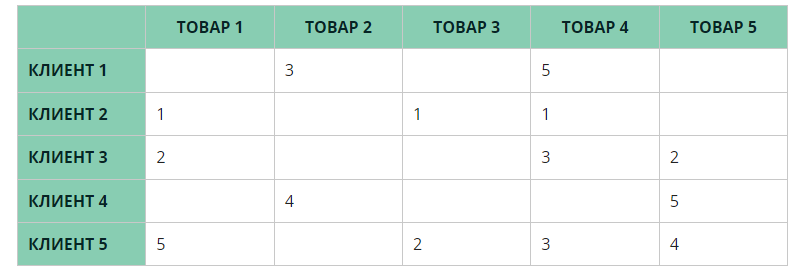

На основе этих данных мы можем разделить пользователей на кластеры. Чтобы это сделать, можно взять некоторую меру близости для пользователей по их истории оценок и на основе полученных значений объединить пользователей в кластеры таким образом, чтобы похожие пользователи оказались в одной группе, а сильно отличающиеся — в разных. В таком случае оценку пользователя для продукта можно прогнозировать как среднюю оценку пользователей этого кластера, оценивших этот продукт.

Таким образом, если нам необходимо предсказать, как конкретный пользователь оценил фильм, мы анализируем оценки, поставленные этому фильму пользователями, которые принадлежат к тому же кластеру, что и изучаемый пользователь, и усредняем эти оценки. Так получается предсказание оценки фильма для нашего пользователя.

В целом, такой подход можно применять, однако у него есть ряд существенных недостатков.

Нечего рекомендовать новым/нетипичным пользователям. Если появляется пользователь, который ни на кого не похож, мы не знаем, к какому кластеру его отнести. На начальных стадиях мы определяем его в случайный кластер, и рекомендации в таком случае будут плохими.

Не учитывается специфика каждого пользователя. По сути, мы выявляем некоторые паттерны поведения и предпочтений и для каждого паттерна выделяем свои рекомендации. Однако на самом деле даже пользователи из одного кластера немного отличаются друг от друга, поэтому возникают неточности.


Если оценок нет, то среднее арифметическое невозможно вычислить. Если в кластере никто не оценивал объект, сделать предсказание не получится, так как для предсказания нужно вычислить среднее арифметическое для оценок.

КОЛЛАБОРАТИВНАЯ ФИЛЬТРАЦИЯ НА ОСНОВЕ ПАМЯТИ (MEMORY-BASED)

Чтобы решить перечисленные выше проблемы, обратимся к коллаборативной фильтрации, а точнее, к memory-based-подходу, основанному на близости пользователей (user-based).

Напомним, что при memory-based-подходе хранится полная матрица взаимодействий (лайков, просмотров и т. д .) пользователя с продуктом.

КОЛЛАБОРАТИВНАЯ ФИЛЬТРАЦИЯ НА ОСНОВЕ ПОЛЬЗОВАТЕЛЕЙ (USER-BASED-ПОДХОД)
Коллаборативная фильтрация на основе пользователей — это метод, используемый для предсказания продуктов, которые могут понравиться пользователю, на основе оценок, выставленных этому продукту другими пользователями, имеющими сходные с целевым пользователем вкусы.

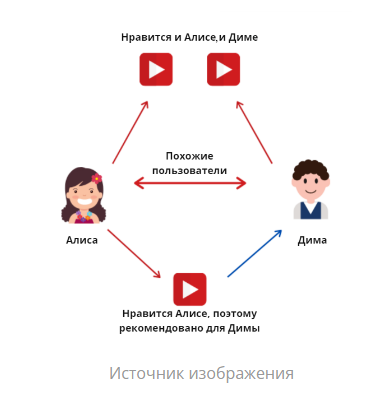

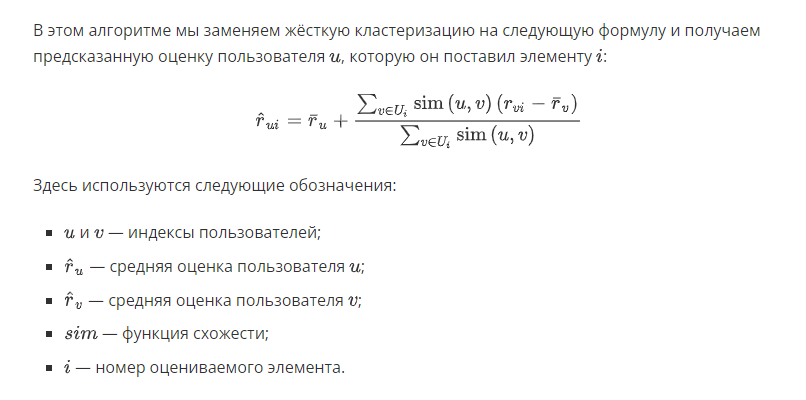

Средняя оценка пользователя может быть никак не привязана к его интересам. По сути, это просто показатель того, как в среднем пользователь привык оценивать фильмы.

Оценка пользователя, которую мы предсказываем для него, состоит из двух частей:

непосредственно его средняя оценка;

слагаемое, состоящее из разницы в оценках с другими пользователями, то есть похожести пользователей. Эта разница домножается на похожесть пользователей, то есть в числителе — средневзвешенная разница в оценках, а в знаменателе — сумма показателей схожести.

Каждому клиенту мы подбираем релевантный для него товар в рамках группы клиентов, но не решаем задачу кластеризации, а усредняем интересы этой группы в дистанции нескольких соседей. По сути, здесь мы руководствуемся идеей, что, например, видео можно порекомендовать человеку, если оно понравилось его друзьям.

Давайте разберём пример применения этого алгоритма.



В матрице четыре пользователя — Алиса, Рома, Катя и Женя. Они оценивают различные приложения из AppStore. Диапазон оценок — от 1 до 5. Знак '?' означает, что этот пользователь не оценил это приложение.

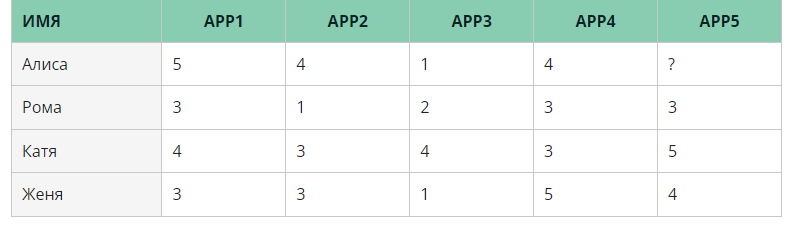

Вычислим сходство как коэффициент корреляции — такой подход также популярен.

Для начала найдём среднее значение рейтинга для каждого пользователя:


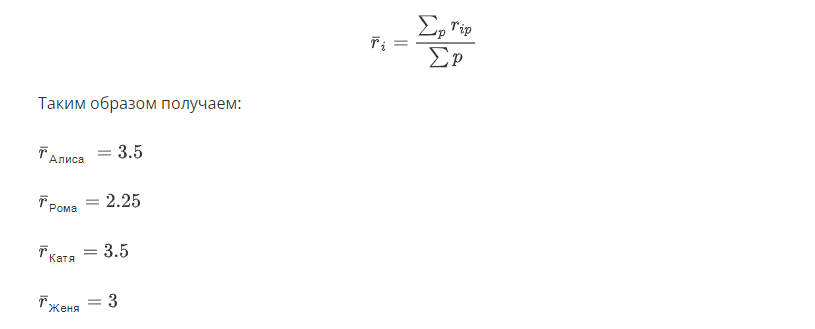

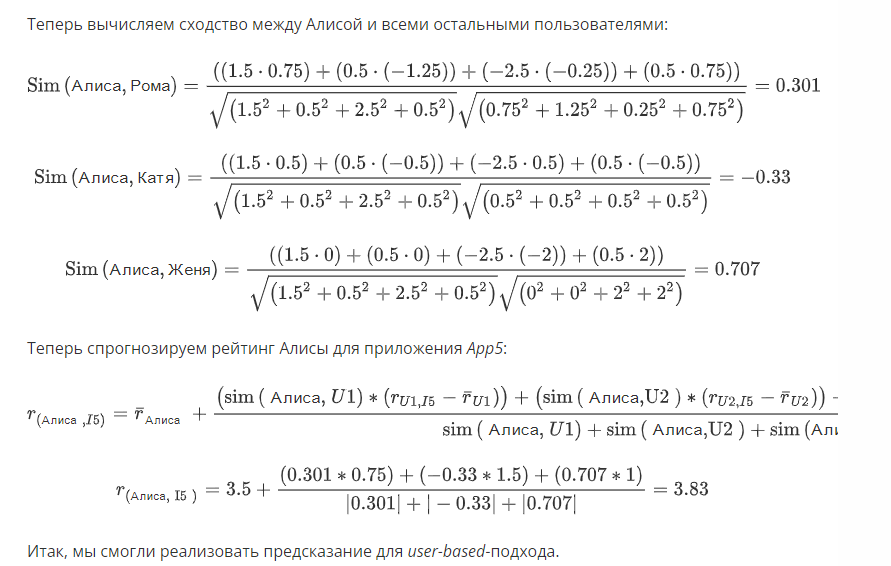

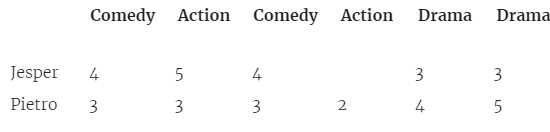

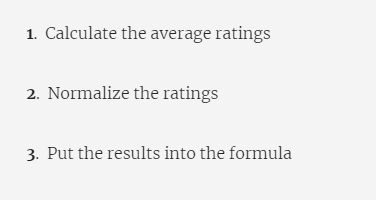

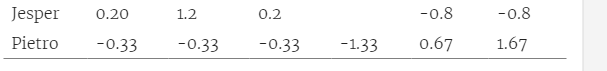

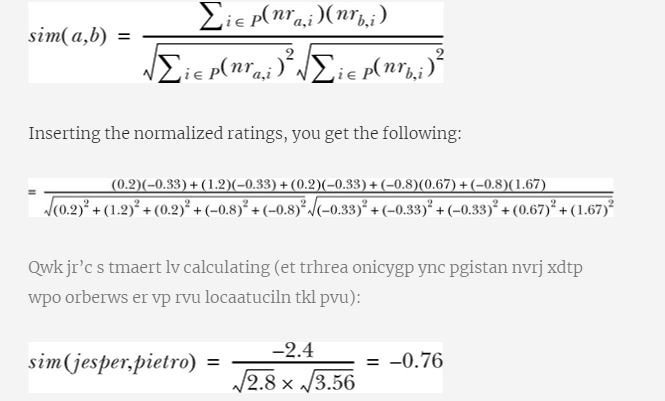

In [1]:
import pandas as pd

In [19]:
data = {'A': [5, 4, 1,4], 'B': [3, 1, 2, 3]}

In [20]:
df1=pd.DataFrame(data)
df1

,A,B
0,5,3
1,4,1
2,1,2
3,4,3


In [21]:
df1.B.mean()

2.25

In [22]:
df1.A.mean()

3.5

In [23]:
df1.A=df1.A-df1.A.mean()
df1.B=df1.B-df1.B.mean()

In [24]:
df1

,A,B
0,1.5,0.75
1,0.5,-1.25
2,-2.5,-0.25
3,0.5,0.75


In [25]:
import numpy as np
from numpy.linalg import norm
 
# define two lists or array
#A = np.array([2,1,2,3,2,9])
#B = np.array([3,4,2,4,5,5])
 
#print("A:", A)
#print("B:", B)
 
# compute cosine similarity
cosine = np.dot(df1.A,df1.B)/(norm(df1.A)*norm(df1.B))
print("Cosine Similarity:", cosine)

Cosine Similarity: 0.30151134457776363


https://livebook.manning.com/book/practical-recommender-systems/chapter-7/1

КОЛЛАБОРАТИВНАЯ ФИЛЬТРАЦИЯ НА ОСНОВЕ ЭЛЕМЕНТОВ (ITEM-BASED-ПОДХОД)

Если мы транспонируем матрицу предпочтений и будем решать ту же самую задачу не для пользователей, а для объектов (items), то получим аналогичную задачу, которая является item-based-моделью коллаборативной фильтрации и даёт нам возможность предсказывать оценку следующим образом:

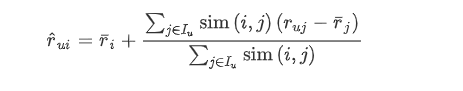

По формуле можно понять, что этот подход использует идею предыдущего, только теперь похожи не пользователи, а объекты. Возвращаясь к примеру с рекомендациями фильмов, теперь мы рекомендуем пользователю фильм, похожий на те фильмы, которые уже понравились этому пользователю ранее.

Кроме того, продуктов обычно больше, чем пользователей, поэтому векторы получатся большей размерности. Это даёт возможность получить более устойчивую модель с большей статистической значимостью.

Может показаться, что коллаборативная фильтрация в рамках item-based-подхода очень похожа на модель на основе контента. Однако это не так: item-based-модель рассматривает взаимодействия пользователей с продуктом, а content-based-модель — метаинформацию продукта.

Теперь давайте рассмотрим преимущества и недостатки коллаборативной фильтрации, основанной на памяти (memory-based).

Может помочь пользователям обнаружить новые релевантные продукты из новых категорий, даже если пользователи не проявляют интерес к новым типам продуктов.
Не требует подробных характеристик и контекстных данных о продуктах. По сути, для реализации нужна только матрица взаимодействий пользователей и продуктов.


Нехватка данных может привести к трудностям при рекомендации новых продуктов или при появлении новых пользователей, поскольку предложения основаны на исторических данных и взаимодействии. Таким образом, для этого подхода актуальна проблема холодного старта.

По мере роста пользовательской базы алгоритмы страдают из-за большого объёма данных (очень ресурсоёмкие вычисления) и недостаточной масштабируемости.

Отсутствие разнообразия в долгосрочной перспективе. Это может показаться нелогичным, поскольку смысл коллаборативной фильтрации заключается в том, чтобы рекомендовать пользователю новые товары. Однако поскольку алгоритмы функционируют на основе исторических рейтингов, они не будут рекомендовать товары с небольшим количеством оценок или ограниченным количеством данных. 
Популярные товары будут более популярны в долгосрочной перспективе, а новых и разнообразных вариантов будет не хватать.

Итак, мы рассмотрели memory-based-подходы коллаборативной фильтрации. Давайте перейдём к следующим подходам, которые относятся к категории model-based и основаны на разложениях матриц. После этого мы сможем сравнить изученные модели при решении практической задачи.

Матричная факторизация используется для генерации латентных признаков путём разложения разрежённой матрицы взаимодействия пользователя и продукта на две меньшие и плотные матрицы особенностей пользователей и продуктов.

Под латентными признаками понимаются некоторые выделенные на основе данных факторы. Например, это может быть фактор приверженности определённому жанру фильмов.
Мы получаем разрежённую матрицу из-за того, что продуктов очень много, и, очевидно, каждый пользователь взаимодействовал только с небольшим их количеством. Поэтому в матрице много пустых ячеек (нулей).
Матрицы плотные, так как нам известны характеристики пользователей и продуктов.

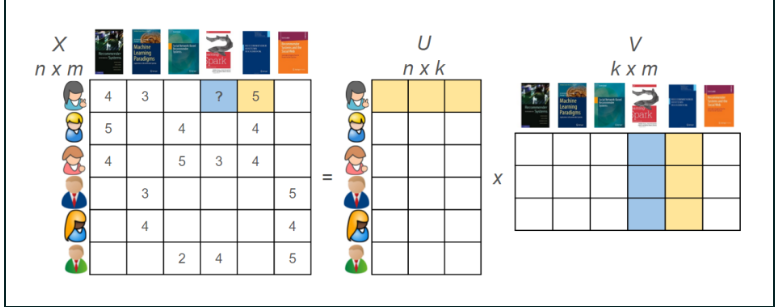

Слева на иллюстрации мы видим разрежённую матрицу (X), а справа — матрицу пользователей U с их характеристиками (размерности k) и матрицу товаров V с их характеристиками (размерности k).

Рассмотрим два варианта матричной факторизации — SVD и ALS.

SVD — это сингулярное разложение. Давайте вспомним суть SVD.

Любую прямоугольную матрицу A размера (n, m) можно представить в виде произведения трёх матриц:

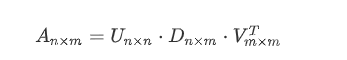

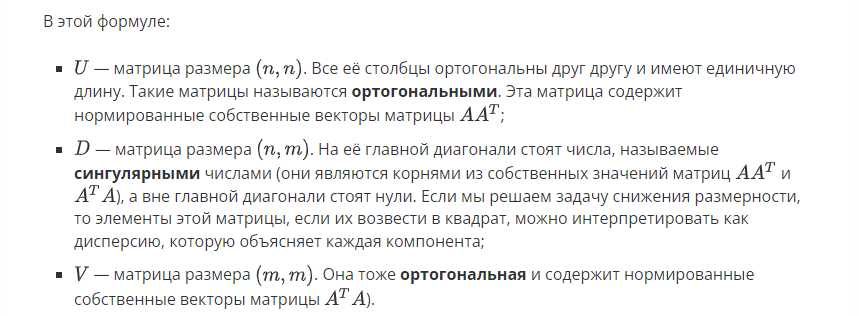

Это разложение используют, чтобы представить матрицу предпочтений как разложение на матрицу с характеристиками пользователей и матрицу с характеристиками продуктов. Матрица U представляет связь между пользователями и латентными факторами, D — диагональная матрица, описывающая силу каждого латентного фактора, а V — матрица, описывающая связь между продуктами и латентными факторами.

Однако SVD — не единственная возможность для разложения матрицы. Второй популярный алгоритм — ALS (Alternating Least Square).

ALS — итеративный алгоритм разложения матрицы предпочтений на произведение двух матриц.

Чтобы понять лучше суть этого алгоритма, вспомним одну из известных нам функций потерь — RMSE.

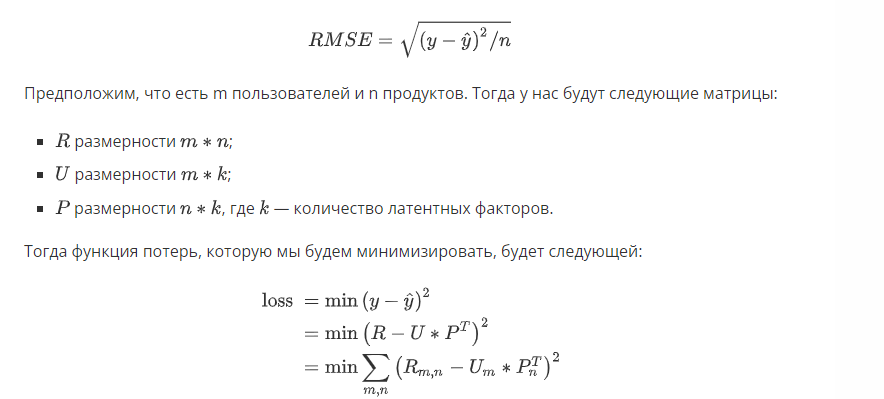

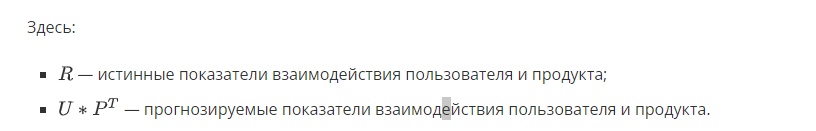

Далее мы, по сути, решаем метод наименьших квадратов для разницы матриц, на каждом шаге уменьшая ошибку сначала по факторам пользователей, а затем — по факторам товаров. Чтобы избежать ситуации переобучения, к ошибке добавляются регуляризационные коэффициенты.

ALS — это итерационный процесс оптимизации, в котором мы на каждой итерации пытаемся приблизиться к факторизованному представлению исходных данных.

Давайте рассмотрим реализацию ALS на «игрушечном» примере. Допустим, у нас есть некоторая матрица, которая содержит информацию про пользователей и их отношение к фильмам:

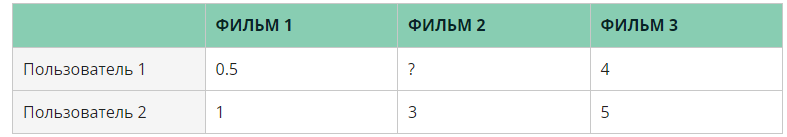

Однако нам неизвестно, какую оценку поставил Пользователь 1 Фильму 2 — её мы и будем пытаться предсказать с помощью ALS.

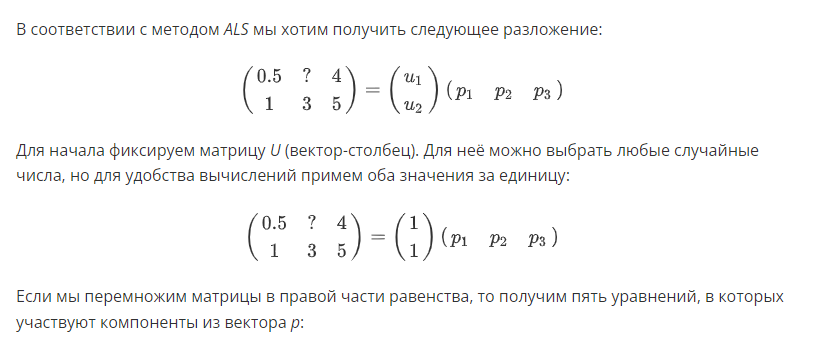

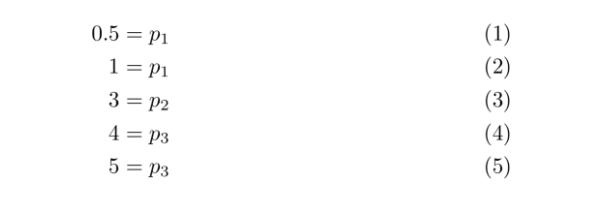

Поскольку существует единственное уравнение, определяющее вторую компоненту P, мы задаём её равной 3. Нам необходимо выбрать оставшиеся две компоненты так, чтобы средняя квадратичная ошибка была минимальной. Таким образом, вычисляем:



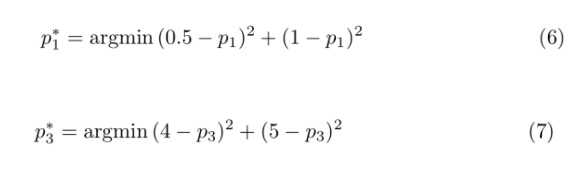

Разумеется, мы умеем вычислять точки минимума для функции, используя производные. Находим точки минимума для обоих случаев и получаем первую оценку для матрицы:

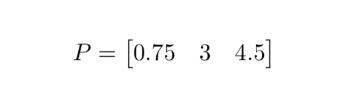

Теперь мы оставляем компоненты матрицы P фиксированными и оптимизируем матрицу U. Это аналогично даёт нам следующие уравнения для U:

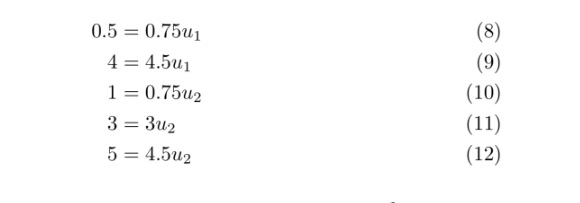

Далее мы можем минимизировать среднеквадратичную ошибку для компонентов матрицы U, как мы это делали ранее для компонентов матрицы P.

Повторяя эти итерации, мы в какой-то момент сходимся к оптимальным матрицам U и P. В этом примере после 20 итераций можно определить, что U и P даны в виде:

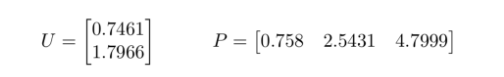

Теперь из этих матриц мы можем получить восстановленную матрицу прогнозируемых взаимодействий пользователей и продуктов, на основе которой мы можем составлять рекомендации.

ПРАКТИКА

Мы рассмотрели несколько вариантов коллаборативной фильтрации на простейших примерах, и теперь пришло время практики с настоящими данными. Сначала мы будем использовать подход memory-based в модификации item-based, а затем SVD. В результате применения обоих алгоритмов мы сможем сравнить получившееся качество.

Для создания алгоритмов рекомендательной системы будем использовать библиотеку surprise.

Установим её:

In [26]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193625 sha256=fbcd56cc640f54d886333b303ddceac9ba6bad6793a8379be825466ec38434f0
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


Примечание. Заметьте, что в названии библиотеки содержится название уже известного нам модуля scikit — это не просто так: названия функций и аргументов, да и сам принцип работы этих модулей похожи.

В нашей задаче мы будем использовать датасет movielens, который содержит информацию о фильмах и выставленных рейтингах с сайта https://movielens.org/.

Импортируем необходимые нам компоненты и считаем данные с помощью специального метода Reader:

In [27]:
from surprise import Dataset
from surprise import Reader
from surprise.dataset import BUILTIN_DATASETS #с помощью этого объекта мы можем использовать встроенные датасеты

data = Dataset.load_from_file(
    "u.data.txt",
    reader=Reader(line_format="user item rating timestamp", sep="\t"),
)

Чтобы обучать рекомендательные системы с помощью surprise, мы создали объект Dataset. Объект surprise.dataset — это набор данных, который содержит следующие поля в указанном порядке:

идентификаторы пользователей;

идентификаторы элементов;

соответствующая оценка.

Преобразуем данные к формату pandas DataFrame для удобной работы с ними:

In [36]:
data.raw_ratings[:4]

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923')]

In [32]:
df = pd.DataFrame(data.raw_ratings, columns=['userId', 'movieId', 'rating', 'timestamp'])
df

,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


В данных присутствуют следующие признаки:

userId — идентификаторы пользователей сайта movielens;

movieId — идентификаторы фильмов;

rating — оценки фильмов, выставленные пользователями по шкале от 1 до 5;

timestamp — время оценки фильма пользователем. Этот формат представления времени показывает, сколько секунд прошло с 1 января 1970 года.

Сколько уникальных фильмов в наборе данных?

In [37]:
df.apply('nunique')

userId         943
movieId       1682
rating           5
timestamp    49282
dtype: int64

Какая оценка встречается в наборе данных чаще всего? Введите ответ в виде целого числа.

In [38]:
df['rating'].value_counts()

4.0    34174
3.0    27145
5.0    21201
2.0    11370
1.0     6110
Name: rating, dtype: int64

Библиотека surprise очень похожа на библиотеку sklearn и тоже позволяет разбить данные на обучающую и тестовую выборку всего одной функцией — train_test_split().

Разбейте данные на обучающую и тестовую выборку. Объём тестовой выборки должен составлять 25 % от общего объёма данных. В качестве значения параметра random_state возьмите число 13.

Сколько объектов попало в тестовую выборку?

In [39]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25, random_state=13)
len(testset)

25000

Импортируем функции для построения рекомендательных систем (SVD — для model-based-подхода и KNNBasic — для memory-basic-подхода) и для оценки качества результата.

In [40]:
from surprise import SVD, KNNBasic, accuracy

Теперь реализуем обычную коллаборативную фильтрацию. Выберем оценку схожести через косинусную близость и item-based-подход:

In [41]:
sim_options = {
    'name': 'cosine',
    'user_based': False
}
 
knn = KNNBasic(sim_options=sim_options)

In [42]:
knn.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Теперь давайте посмотрим, какие рекомендации мы получили, с помощью следующей программы:



In [43]:
predictions = knn.test(testset)
predictions

[Prediction(uid='7', iid='633', r_ui=5.0, est=4.199452349030111, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='422', iid='287', r_ui=3.0, est=3.4703437660463736, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='804', iid='163', r_ui=3.0, est=3.5716736533692854, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='189', iid='480', r_ui=5.0, est=4.222825780855538, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='238', iid='546', r_ui=3.0, est=3.473417286928204, details={'actual_k': 17, 'was_impossible': False}),
 Prediction(uid='804', iid='216', r_ui=4.0, est=3.922551907749182, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='350', iid='204', r_ui=4.0, est=4.345238219480267, details={'actual_k': 38, 'was_impossible': False}),
 Prediction(uid='708', iid='993', r_ui=4.0, est=3.4458505791534115, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='193', iid='1078', r_ui=4.0, es

После этого можно вывести результат, записанный в переменную predictions.

Информация о каждой паре будет содержать следующие характеристики:

uid — id пользователя;

iid — id элемента;

r_ui (float) — реальный рейтинг, который этот пользователь поставил этому элементу;

est (float) — предсказанный рейтинг.

Каков реальный рейтинг, выставленный пользователем с ID 500 для фильма с ID 699?

аков прогнозируемый рейтинг для пользователя с ID 500 и фильма с ID 699? Ответ округлите до двух знаков после точки-разделителя.

In [44]:
for prediction in predictions:
    if prediction.uid == '500' and prediction.iid == '699':
        print(prediction.r_ui)
        print(round(prediction.est, 2))
        break

3.0
3.47


In [51]:
uid = str(500)
iid = str(699)  
pred = knn.predict(uid, iid, verbose=True)

user: 500        item: 699        r_ui = None   est = 3.47   {'actual_k': 40, 'was_impossible': False}


Теперь необходимо вычислить RMSE для получившихся предсказаний:

In [45]:
accuracy.rmse(predictions)

RMSE: 1.0272


1.0271678039029761

Итак, мы построили систему рекомендаций и даже оценили её качество. Но как же вывести рекомендации для конкретного пользователя?

Для начала давайте оформим наши предсказания в таблицу и отсортируем их по прогнозируемому рейтингу:

In [46]:
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)

In [48]:
pred.head()

,uid,iid,r_ui,est,details
22469,849,234,5.0,4.951929,"{'actual_k': 19, 'was_impossible': False}"
1974,849,427,4.0,4.950547,"{'actual_k': 19, 'was_impossible': False}"
8272,849,568,4.0,4.949215,"{'actual_k': 19, 'was_impossible': False}"
5138,849,174,5.0,4.947691,"{'actual_k': 19, 'was_impossible': False}"
22021,688,1127,5.0,4.928412,"{'actual_k': 15, 'was_impossible': False}"


Теперь мы можем вывести рекомендуемые для конкретного пользователя фильмы, начиная от наиболее релевантного (с точки зрения рекомендаций) и заканчивая наименее релевантным.

In [49]:
recom = pred[pred.uid =='849']['iid'].to_list()

In [50]:
recom

['234', '427', '568', '174']

Реализуйте user-based-алгоритм. Какое значение RMSE получилось для коллаборативной фильтрации типа user-based? Ответ округлите до двух знаков после точки-разделителя.

In [53]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
knn = KNNBasic(sim_options=sim_options)
knn.fit(trainset)
predictions = knn.test(testset)
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0175


1.0174852296380237

Теперь давайте сравним полученные результаты с результатами SVD-алгоритма. Реализуйте SVD с параметрами по умолчанию.

Какое значение RMSE получилось для SVD? Ответ округлите до двух знаков после точки-разделителя.

In [54]:
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9396


0.9396038847419304

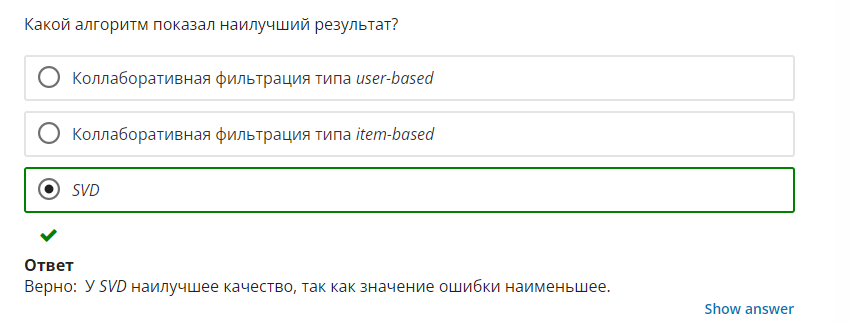

В этом юните мы не только разобрались с принципом работы различных вариаций коллаборативной фильтрации, но и реализовали их на практике, а также сравнили результаты, полученные с помощью разных подходов. В следующем юните вы познакомитесь с ещё одним подходом к построению рекомендательных систем, а также изучите ещё одну библиотеку, с помощью которой можно строить рекомендации.